In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.datasets import load_boston
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
boston = load_boston()
bos = pd.DataFrame(boston.data,columns=boston.feature_names)

In [3]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# Target value is missing so we have to create the target vlaue
bos['MEDV'] = boston.target

In [5]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
bos.shape

(506, 14)

/home/mukesh/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


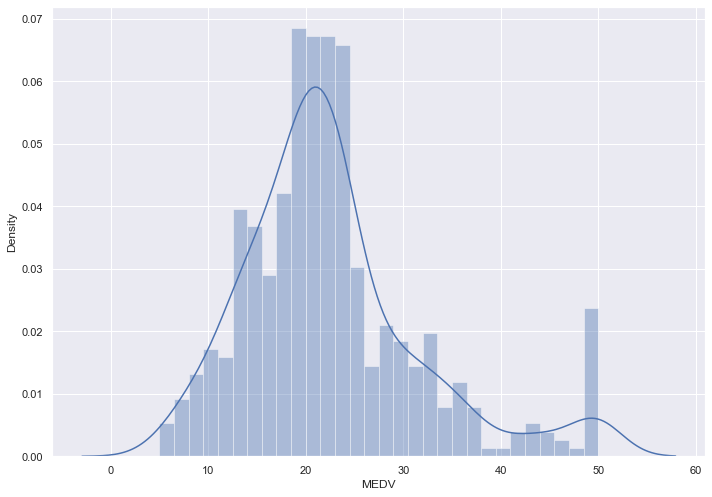

In [14]:
# Now do EDA in the Data Set.
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(bos['MEDV'], bins = 30)
plt.show()

<AxesSubplot:>

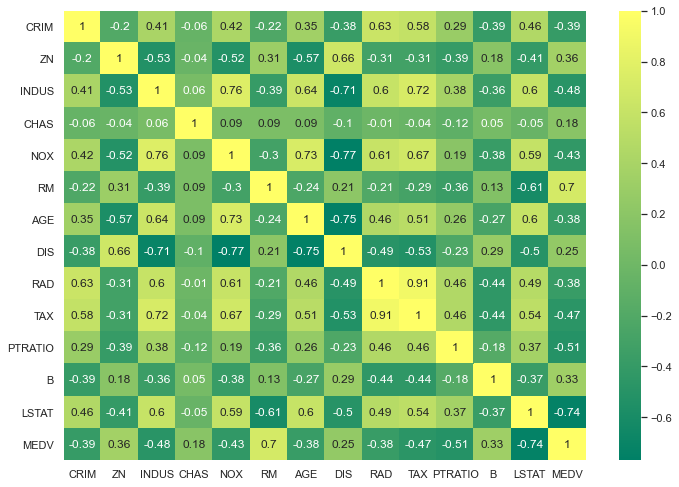

In [15]:
corr_matrix = bos.corr().round(2)
sns.heatmap(data=corr_matrix,annot=True,cmap='summer')

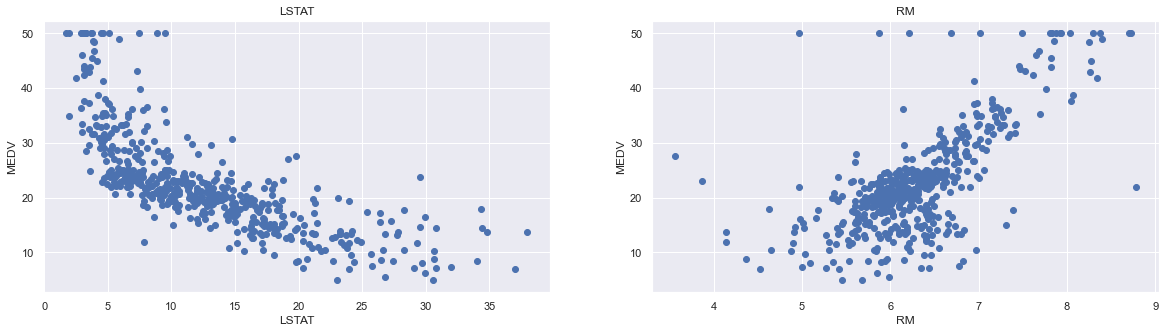

In [16]:
plt.figure(figsize=(20,5))

features = ['LSTAT','RM'] # correlation of these are high and low related to target
target = bos['MEDV']

for i, col in enumerate(features):
    plt.subplot(1,len(features), i+1)
    
    x = bos[col]
    y = target
    
    plt.scatter(x,y, marker = 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')


## Preparing the data for the training the model

In [17]:
bos.AGE.unique()

array([ 65.2,  78.9,  61.1,  45.8,  54.2,  58.7,  66.6,  96.1, 100. ,
        85.9,  94.3,  82.9,  39. ,  61.8,  84.5,  56.5,  29.3,  81.7,
        36.6,  69.5,  98.1,  89.2,  91.7,  94.1,  85.7,  90.3,  88.8,
        94.4,  87.3,  82. ,  95. ,  96.9,  68.2,  61.4,  41.5,  30.2,
        21.8,  15.8,   2.9,   6.6,   6.5,  40. ,  33.8,  33.3,  85.5,
        95.3,  62. ,  45.7,  63. ,  21.1,  21.4,  47.6,  21.9,  35.7,
        40.5,  29.2,  47.2,  66.2,  93.4,  67.8,  43.4,  59.5,  17.8,
        31.1,  36.8,  33. ,  17.5,   7.8,   6.2,   6. ,  45. ,  74.5,
        53.7,  33.5,  70.4,  32.2,  46.7,  48. ,  56.1,  45.1,  56.8,
        86.3,  63.1,  66.1,  73.9,  53.6,  28.9,  77.3,  57.8,  69.6,
        76. ,  36.9,  62.5,  79.9,  71.3,  85.4,  87.4,  90. ,  96.7,
        91.9,  85.2,  97.1,  91.2,  54.4,  81.6,  92.9,  95.4,  84.2,
        88.2,  72.5,  82.6,  73.1,  69.7,  84.1,  97. ,  95.8,  88.4,
        95.6,  96. ,  98.8,  94.7,  98.9,  97.7,  97.9,  98.4,  98.2,
        93.5,  93.6,

In [18]:
def age_conv(x):
        if x <=16:
            return 0
        elif x > 16 and x <=32:
            return 1

        elif x > 32 and x <=48:
            return 2

        elif x > 48 and x <=64:
            return 3

        elif x > 64:
            return 4
        
bos.AGE = bos.AGE.apply(age_conv) 

In [19]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,4,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,4,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,3,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,2,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,3,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,4,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,4,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,4,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,4,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [20]:
X = bos.drop(columns = 'MEDV')
y = bos['MEDV']

In [21]:
X.shape

(506, 13)

In [22]:
y.shape

(506,)

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 3)

In [24]:
#let's first visualize the tree on the data without doing any pre processing
clf = RandomForestRegressor(random_state=6)


In [25]:
clf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=6, verbose=0, warm_start=False)

In [26]:
# accuracy of our regression tree
clf.score(x_test,y_test)

0.8381744691637243

In [27]:
clf.predict(x_test)

array([41.96 , 17.701, 19.99 , 30.671, 22.4  , 21.021, 15.642,  7.574,
       19.637, 17.175, 13.69 , 29.625, 35.025, 26.459,  6.499, 11.377,
       20.684, 15.028, 15.209, 22.886, 28.398, 45.697, 23.032, 23.936,
       11.843, 24.339, 19.66 , 20.086, 20.756, 20.882, 15.263, 35.455,
       20.135, 21.211, 17.605, 11.76 , 24.237, 33.77 , 18.895, 23.325,
       16.017,  9.041, 21.067, 15.413, 20.42 , 26.559, 21.495, 17.388,
       26.781, 20.437, 27.228, 21.522, 46.659, 18.903, 21.176, 20.003,
       49.004, 14.535, 28.839, 19.946, 20.965, 22.027, 33.311, 31.203,
       20.708, 22.744, 33.824, 22.59 , 27.855, 24.241, 23.834, 25.982,
       16.03 , 29.968, 10.685, 20.932, 19.653, 26.971, 24.553, 14.776,
       26.998, 15.209, 12.6  , 19.597, 23.565, 11.928, 25.916, 11.633,
       20.757, 22.823, 20.628, 20.383, 20.58 , 43.716, 27.466, 15.508,
       47.365, 14.96 , 21.202, 35.244, 21.891, 19.907, 13.497, 21.293,
       32.104, 13.831, 20.437, 16.383, 21.149, 39.909, 15.61 , 11.496,
      

In [29]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['mse','mae'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [30]:
grid_search = GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [31]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 20736 candidates, totalling 103680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | e

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=6,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [32]:
#let's see the best parameters as per our grid search
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': 11,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 130}

In [38]:
clf = RandomForestRegressor(criterion='mse',
 max_depth = 11,
 max_features= 'auto',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 130)

In [39]:
clf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=11, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=130, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [41]:
clf.score(x_test,y_test)

0.8401773108677733